# Lecture 15 - Support Vector Machines (SVMs)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

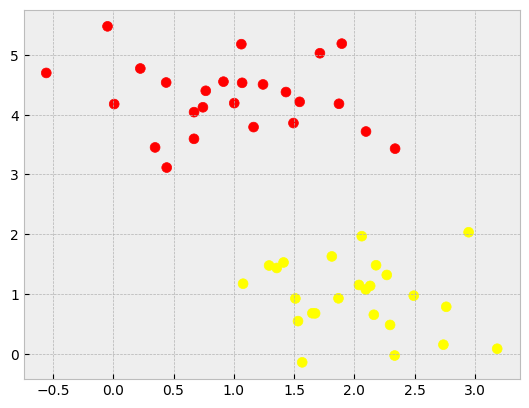

In [14]:
from sklearn.datasets import make_blobs

X, t = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.6)

plt.scatter(X[:, 0], X[:, 1], c=t, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

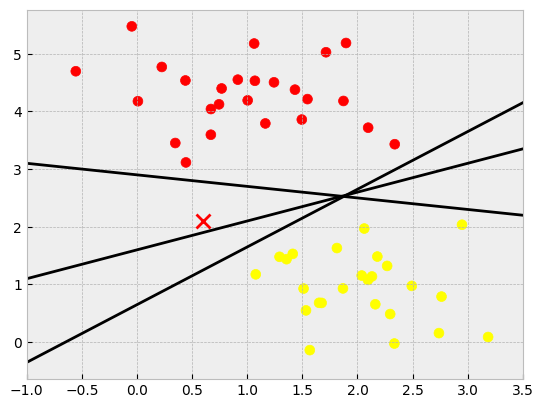

In [18]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=t, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

# Kernel Machine

Consider the following data set:

Kernel methods = algorithms that learn using similarity instead of raw features.

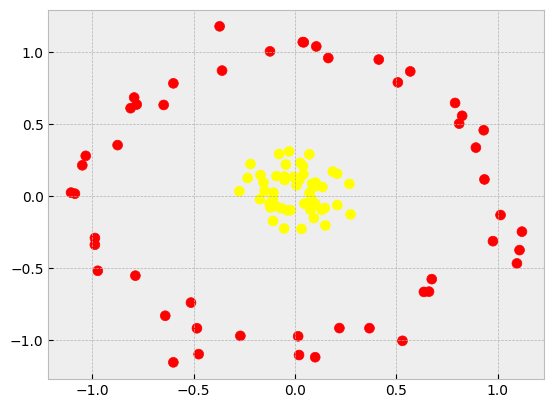

In [30]:
from sklearn.datasets import make_circles

X, t = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=t, s=50, cmap='autumn');

The two classes are clearly not linearly separable. What would you do?

In [31]:
X

array([[ 0.8927245 ,  0.33601474],
       [ 0.10527674,  1.03901798],
       [-0.0673822 , -0.08460478],
       [ 0.08103995, -0.01948111],
       [ 0.2092276 , -0.06282096],
       [-0.10582555,  0.02321962],
       [-0.97236841, -0.51945031],
       [-0.35950523,  0.87096828],
       [-0.1081843 , -0.17350213],
       [-0.12299629,  1.00455899],
       [-0.12108286, -0.07915284],
       [ 0.0255289 ,  0.23055124],
       [ 0.66143367, -0.66437803],
       [-0.05059962,  0.11069242],
       [ 0.16454949,  0.95835909],
       [ 0.03864141,  1.06903335],
       [ 0.09939573,  0.06744614],
       [-0.27431473,  0.03309375],
       [ 0.41362164,  0.94774613],
       [-0.12450096, -0.05342397],
       [ 0.02131359,  0.11176827],
       [-0.07809523,  0.29181148],
       [ 0.93132881,  0.45669752],
       [-0.78701741, -0.55340599],
       [-0.98677074, -0.33873165],
       [-1.08525664,  0.01598213],
       [ 0.09999004, -1.11988288],
       [-0.05135623,  0.13488142],
       [ 0.00790517,

In [32]:
t

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [38]:
r = np.exp(-((X - X.mean(axis=0))** 2/(2*X.std(axis=0, ddof=1)**2)).sum(axis=1))

ri​=exp(−1/2​∑_j(x_ij​−μ_j​)^2/ ​σ_j^2​​)
This produces a value between 0 and 1, where:

Samples close to the mean → r ≈ 1

Samples far from the mean → r ≈ 0

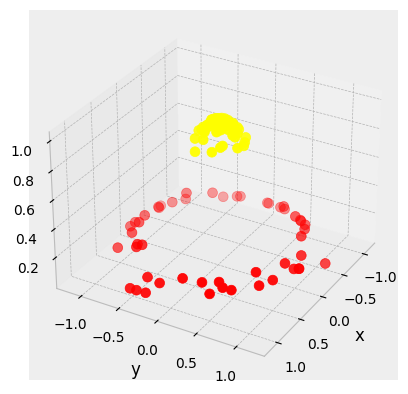

In [46]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=t):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=t, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D();

## Kernel Function

The kernel function is defined as:

\begin{align*}
k: \mathbb{R}^d \times \mathbb{R}^d &\longrightarrow \mathbb{R}\\
(\mathbf{x},\mathbf{y})&\longmapsto k(\mathbf{x},\mathbf{y})=\phi(\mathbf{x})^T\phi(\mathbf{y})
\end{align*}

where $\phi(x)$ is a fixed nonlinear feature space mapping

\begin{align*}
\phi: \mathbb{R}^d &\longrightarrow \mathbb{R^D}\\
\mathbf{x}&\longmapsto \phi(\mathbf{x})
\end{align*}

where $D>d$.

A popular kernel function is the **radial basis function** (RBF kernel):

\begin{align*}
k_{\text{RBF}}(\mathbf{x},\mathbf{y}) &= \exp\left(-\gamma\Vert\mathbf{x}-\mathbf{y}\Vert^2\right)
\end{align*}

typical values for $\gamma=\frac{1}{2\sigma^2}$. As you can see, the RBF kernel is measures the **similarity** between two points as a function of the kernnel *bandwidth* $\sigma$.

------------------------------------------------------------------
Here is a **super simple, beginner-friendly explanation** of everything shown in your screenshot — no math background needed.

---

# 🌟 **What is a Kernel Function? (Newbie Explanation)**

A **kernel** is just a *similarity calculator*.

It tells you **how similar two data points are**.

Examples in real life:

* Face recognition compares two faces → similarity
* Spotify recommends songs similar to ones you like
* Google Photos groups similar objects together

Kernel functions do the same thing for **machine learning data**.

---

# 🧠 **Why do we need kernels?**

Some data is **not linearly separable**.
For example, circles inside circles.

A kernel lets us:
✔ Pretend the data is in a **higher-dimensional space**
✔ Without ever **actually** doing the transformation

This trick is called the **Kernel Trick**.

---

# 🔧 The Math in the Image (Explained Simply)

### ### 1️⃣ The kernel function is written as:

[
k(\mathbf{x}, \mathbf{y}) = \phi(\mathbf{x})^T\phi(\mathbf{y})
]

This looks scary, but here’s the easy version:

### 👉 **Meaning:**

Instead of comparing x and y directly,
we first **convert** them into a more complex feature space using:

[
\phi(x)
]

Think of ϕ(x) as a transformation like:

🟦 “Take the original features and generate more complicated ones.”

But **you don't have to compute ϕ(x)**.
The kernel function **does it for you automatically**.

---

# 2️⃣ **What is ϕ(x)?**

[
\phi: \mathbb{R}^d \rightarrow \mathbb{R}^D
]

This simply means:

* Your original data has **d features**
* The transformed space has **D features**, where **D is much bigger**

Example:
A 2D point (x, y) might become a huge feature vector after transformation.

But the kernel trick avoids doing this manually.

---

# 🌈 **The RBF Kernel — Most Popular One**

The document shows the RBF kernel:

[
k_{\text{RBF}}(x,y) = \exp\left(-\gamma |x - y|^2\right)
]

### ❗SUPER SIMPLE MEANING:

* If two points are **close** → kernel value ≈ **1**
* If they are **far** → kernel value ≈ **0**

This is exactly like asking:

**"How close are x and y?"**

It’s like a **smooth distance measure**.

---

# 🎨 Why Does This Work?

Because instead of saying:

> “Draw a straight line to separate classes”

You can say:

> “Use similarities between points to create curved boundaries.”

That’s why RBF kernels create **curvy decision boundaries**.

---

# 🟢 Summary (For Newbies)

| Concept          | Easy Explanation                                                             |
| ---------------- | ---------------------------------------------------------------------------- |
| **Kernel**       | A function that tells how similar two data points are.                       |
| **ϕ(x)**         | A fancy transformation to a higher-dimensional space (you never compute it). |
| **Kernel Trick** | Compute similarity *as if* data was transformed — without doing the work.    |
| **RBF Kernel**   | A smooth similarity measure based on distance.                               |
| **Why use it?**  | Helps ML models learn nonlinear patterns.                                    |

---------------------------------------------------------------------------------------------------------------

# Support Vector Machines: Maximizing the Margin

SVMs offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

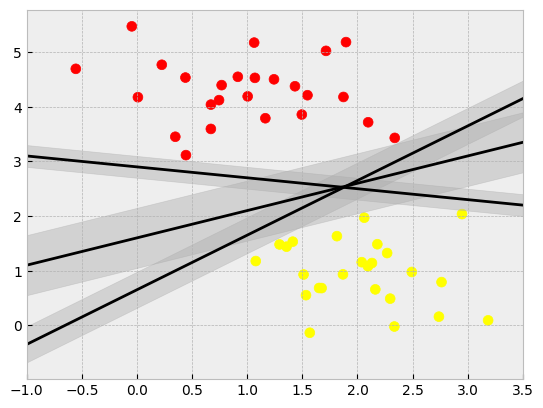

In [47]:
X, t = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=t, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator.

# Support Vector Machine: Separable Classes

Let's start with the two-class linearly separable task and then we will extend the method to more general cases where data are not separable. Let $\phi(x_i)$, $i=1,2,\dots,N$, be the feature vectors of the training set, $X$, and corresponding target values $t_1, t_2, \cdots, t_N$ where $t_n\in\{-1,1\}$. These belong to either of two classes, $C_1$, $C_2$, which are *assumed to be linearly separable*.

The goal, once more, is to design a hyperplane

$$y(x) = w^T\phi(x) + b = 0$$

that classifies correctly all the training vectors.

Because the training data is linearly separable in the feature space, by definition there exists at least one choice of the parameters $w$ and $b$ such that $y(x)$ satisfies $y(x_n)>0$ for points having $t_n = +1$ and $y(x_n)<0$ for points having $t_n = -1$, so that $t_ny(x_n) > 0$ for all training data points.

Such a hyperplane is not unique. The perceptron algorithm may converge to any one of the possible solutions. Having gained in experience, this time we will be more demanding. 

* Which hyperplane would any sensible engineer choose as the classifier for operation in practice, where data outside the training set will be fed to it? 

* Once again, the hyperplane that leaves more “room” on either side, so that data in both classes can move a bit more freely, with less risk of causing an error. 

* A sensible choice for the hyperplane classifier would be the one that leaves the maximum margin from both classes.

* Thus such a hyperplane can be trusted more, when it is faced with the challenge of operating with unknown data.
    * It has a higher generalizarion performance.

## Quantifying the "Margin"

Let us now quantify the term "margin" that a hyperplane leaves from both classes. Every hyperplane is characterized by its direction (determined by $w$) and its exact position in space (determined by $b$). Since we want to give no preference to either of the classes, then it is reasonable for each direction to select that hyperplane which has the same distance from the respective nearest points in $c_1$ and $c_2$.

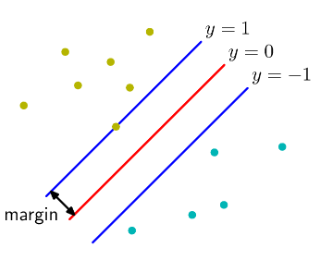

In [49]:
from IPython.display import Image
Image('image.png', width=400)
#Source: Bishop, Pattern Recognition and Machine Learning, 2006

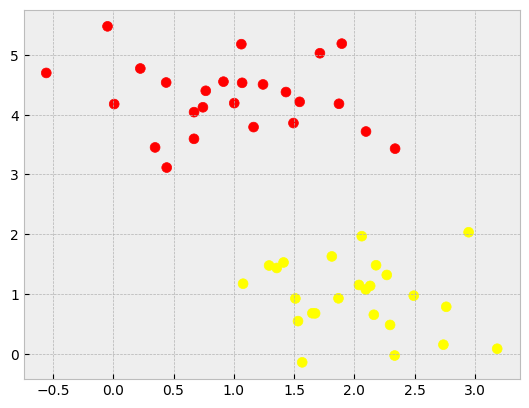

In [50]:
X, t = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=t, s=50, cmap='autumn');

In [52]:
from sklearn.svm import SVC # "Support vector classifier"

SVC?

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

In [53]:
svm = SVC(kernel='linear')
svm.fit(X, t)

SVC(kernel='linear')

In [54]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

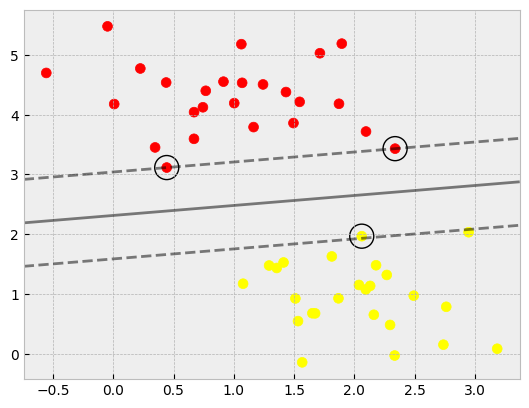

In [55]:
plt.scatter(X[:, 0], X[:, 1], c=t, s=50, cmap='autumn')
plot_svc_decision_function(svm);

In [56]:
## support vectors 

svm.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

## What if the classes are not linearly separable?

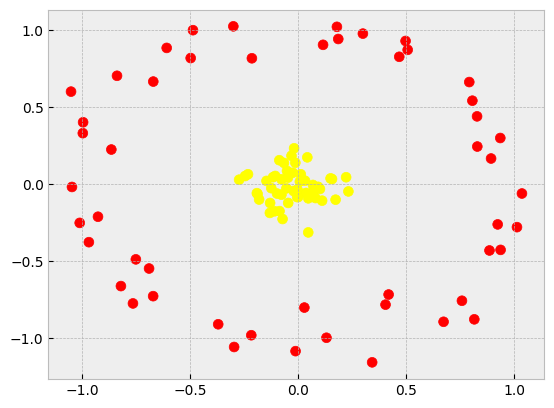

In [57]:
from sklearn.datasets import make_circles

X, t = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=t, s=50, cmap='autumn');

The two classes are clearly not linearly separable. What would you do?

In [58]:
r = np.exp(-((X - X.mean(axis=0))** 2/(2*X.std(axis=0, ddof=1)**2)).sum(axis=1))

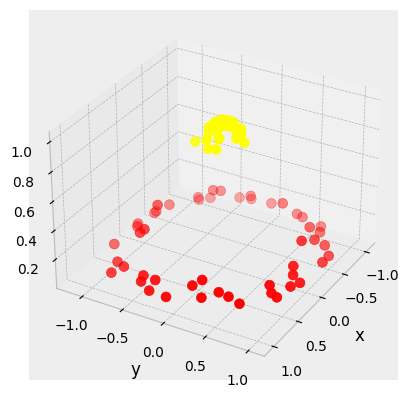

In [59]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=t):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=t, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D();

In [12]:
from sklearn.svm import SVC 

# SVC stands for "Support vector classifier"

In [61]:
# Helper function
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

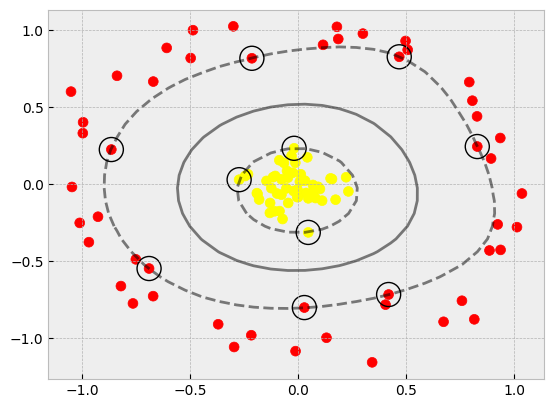

In [ ]:
svm = SVC(kernel='rbf', C=1E6) #1E6 = 1×106 = 1,000,000
svm.fit(X, t)

plt.scatter(X[:, 0], X[:, 1], c=t, s=50, cmap='autumn')
plot_svc_decision_function(svm)
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

# Measuring the Distance of Points to the Discriminant Function

Recall that the perpendicular distance of a point $x$ from a hyperplane defined by $y(x) = 0$ where $y(x)$ takes the form $y(x) = w^T\phi(x)+w_0$ is given by $\frac{|y(x)|}{\Vert w\Vert}$.


Furthermore, we are only interested in solutions for which all data points are **correctly classified**, so that $t_n y(x_n) > 0, \forall n$. Thus the distance of a point $x_n$ to the decision surface is given by

$$\frac{t_n y(x_n)}{\Vert w\Vert} = \frac{t_n \left(w^t\phi(x_n) + w_0\right)}{\Vert w\Vert}$$

The margin is given by the perpendicular distance to the closest point $x_n$ from the data set, and we wish to optimize the parameters $w$ and $b$ in order to maximize this distance. Thus the maximum margin solution is found by solving

$$\arg_{w,b}\max \left\{\frac{1}{\Vert w\Vert}\min_n \left[t_n(w^T\phi(x_n)+b)\right]\right\}$$

where the factor $\frac{1}{\Vert w\Vert}$ is taken outside the optimization over $n$ because $w$ does not depend on $n$.

* Direct solution of this optimization problem would be very complex, and so we shall convert it into an equivalent problem that is much easier to solve. 

* To do this we note that if we make the rescaling $w\rightarrow \kappa w$ and $b\rightarrow \kappa b$, then the distance from any point $x_n$ to the decision surface, given by $\frac{t_n y(x_n)}{\Vert w\Vert}$, is unchanged. We can use this freedom to set

$$t_n(w^T\phi(x_n)+b) = 1$$

for the point that is closest to the surface, called the **support vectors**. In this case, all data points will satisfy the constraints

$$t_n(w^T\phi(x_n)+b) \geq 1, n=1, 2, \dots, N$$

* This is known as the canonical representation of the decision hyperplane. 

* In the case of data points for which the equality holds (support vectors), the constraints are said to be active, whereas for the remainder they are said to be inactive. 

* By definition, there will always be at least one active constraint, because there will always be a closest point, and once the margin has been maximized there will be at least two active constraints.

The optimization problem then simply requires that we maximize $\Vert w\Vert^{-1}$, which is equivalent to minimizing $\Vert w\Vert^2$, and so we have to solve the optimization problem

\begin{align*}
&\arg_{w,b}\min \frac{1}{2} \Vert w\Vert^2 \\
& \text{subject to } t_n(w^T\phi(x_n)+b) \geq 1
\end{align*}

# Support Vectors (SV)

Note that a small subset of training points (from either class) will determine where this discriminant function will be placed. The points lying exactly on the margin, on either side of the discriminant function are called the **support vectors**. They are the closest points to the discriminant function $y(x)$ are the *representatives* for each class.

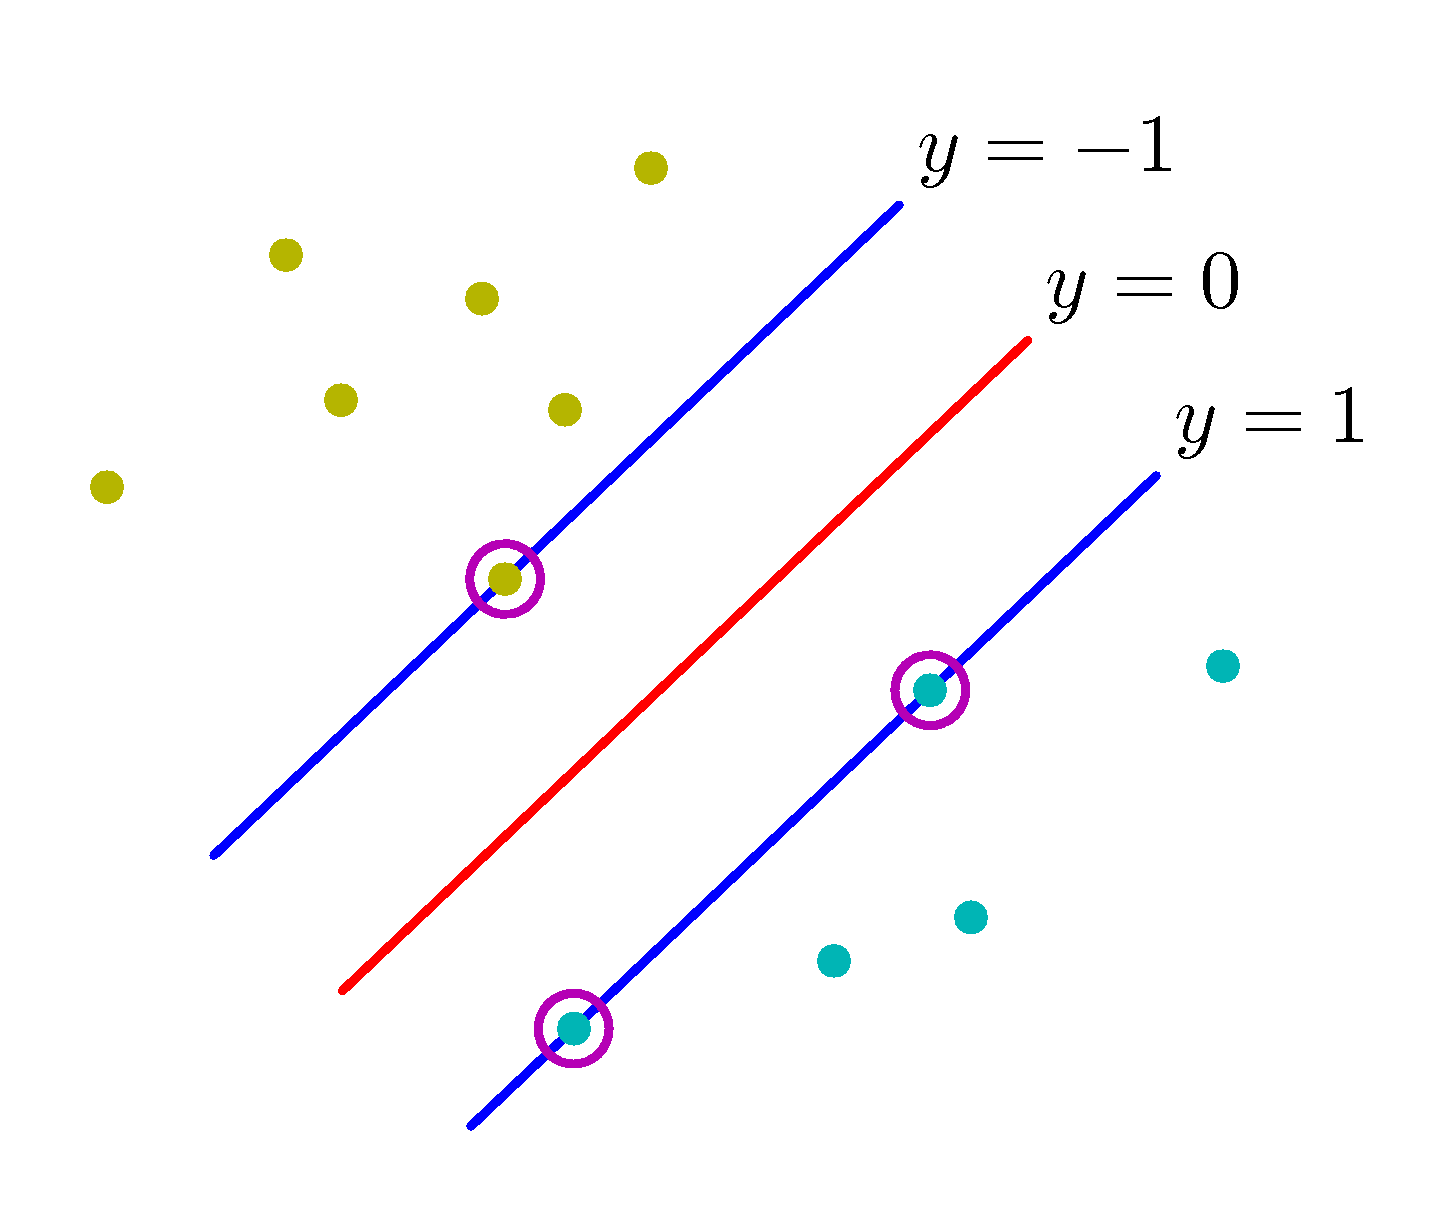

In [2]:
Image('figures/Figure7.1b.png', width=400)
#Source: Bi/absshop, Pattern Recognition and Machine Learning, 2006

The support vectors (SVs) are the only training points that are needed to defined the discriminant function $y(x)=\mathbf{w}^T\phi(x)+w_0$. And thus, once the SVs are identified from the training data, any other point that is **not** an SV can be **discarded**.

During **inference**, SVMs perform a similarity measure between test points are the **support vectors**. If the test point is most similar with SVs from $C_1$, then it will be classified as $C_1$, otherwise it will be classified as $C_2$.

# Measuring Similarity

SVMs use kernel functions to mesure similarity between pairs of points. These kernel functions are defined as the inner product of feature transformation $\phi(x)$. Of course, not all feature transformations will lead to a well-defined kernel function.

* SVMs works with kernel functions equipped with an inner product only.

## Kernel Function

The kernel function is defined as:

\begin{align*}
k: \mathbb{R}^d \times \mathbb{R}^d &\longrightarrow \mathbb{R}\\
(\mathbf{x},\mathbf{y})&\longmapsto k(\mathbf{x},\mathbf{y})=\phi(\mathbf{x})^T\phi(\mathbf{y})
\end{align*}

where $\phi(x)$ is a fixed nonlinear feature space mapping

\begin{align*}
\phi: \mathbb{R}^d &\longrightarrow \mathbb{R^D}\\
\mathbf{x}&\longmapsto \phi(\mathbf{x})
\end{align*}

where $D>d$.

An inner product is a function that takes two inputs from a space and outputs a single value by combining the inputs, and is expressed as $\langle\mathbf{x},\mathbf{y}\rangle$. For example, the dot product between two vectors: $\langle\mathbf{x},\mathbf{y}\rangle = \mathbf{x}\cdot\mathbf{y} = \sum_{i=1}^d x_iy_i$. 

A **kernel** is a function that calculates the inner product in an enlarged feature space using only values from the original feature space, and is expressed as $K(\mathbf{x},\mathbf{y})$. For example, using the mapping $\phi(\mathbf{x})$ below,

\begin{align*}
\phi: \mathbb{R}^2 &\longrightarrow \mathbb{R}^3 \\
[x_1,x_2] &\longmapsto [x_1^2, \sqrt{2}x_1x_2, x_2^2]
\end{align*}

the related kernel for the dot product in the enlarged space is

\begin{align*}
K((x_1,x_2),(y_1,y_2)) &= \langle(x_1^2,\sqrt{2}x_1x_2,x_2^2),(y_1^2,\sqrt{2}y_1y_2,y_2^2)\rangle\\
&= x_1^2x_2^2 + 2x_1x_2y_1y_2 + y_1^2y_2^2\\
&= (x_1x_2 + y_1y_2)^2
\end{align*}

* The inner product of two instances is calculated in the feature space.
* A mapping sends these instances to the enlarged space. $[x_1,x_2]$ maps to $[x_1^2, \sqrt{2}x_1x_2, x_2^2]$ and $[y_1,y_2]$ maps to $[y_1^2, \sqrt{2}y_1y_2, y_2^2]$.
* The inner product between the instances is calculated in the enlarged space.
* The kernel, $K(\mathbf{x},\mathbf{y})$, encodes this mapping and then the inner product. Sometimes the kernel is calculated directly from the feature space.

Kernels used in support vector classification typically measure the similarity or distance between instances. The most commonly used kernels for support vector classifiers are listed below.

### Common Kernels

1. **Polynomial kernel**

$$K(\mathbf{x},\mathbf{y}) = (1 + \langle\mathbf{x},\mathbf{y}\rangle)^d$$

Instances are mapped into an enlarged space of polynomial powers similar to the example at the section's start. The decision boundary will curve some.

2. **Radial Basis Function (RBF) kernel**

$$K(\mathbf{x},\mathbf{y}) = e^{-\gamma \Vert\mathbf{x}-\mathbf{y}\Vert^2}$$

Instances are mapped into an enlarged space where each dimension is related to the distance from one instance. An instance that is closer to a dimension's instance in the feature space will have a larger value. The decision boundary will curve around clusters of instances of the same class.

3. **Sigmoid kernel**

$$K(\mathbf{x},\mathbf{y}) = \text{tanh}(\gamma\langle\mathbf{x},\mathbf{y}\rangle + 1)$$

The sigmoid function is used due to a similar response to biological neurons. The sigmoid function restricts the gains from large inputs to between -1 and 1, reducing the spread of values in the enlarged space.

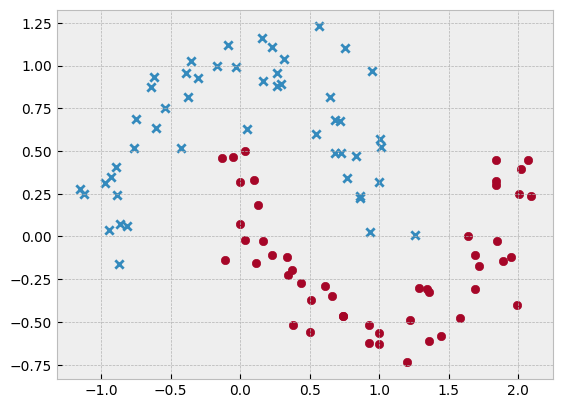

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons

X, t = make_moons(n_samples=100, noise=0.15, random_state=0)
plt.scatter(X[t==0,0], X[t==0,1], marker='x')
plt.scatter(X[t==1,0], X[t==1,1]);

In [13]:
 
poly_svm = Pipeline([('poly_features', PolynomialFeatures(degree=3)),
                     ('scaler', StandardScaler()),
                    ('SVC', SVC(kernel='linear', C=10))])
poly_svm.fit(X, t)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('SVC', SVC(C=10, kernel='linear'))])

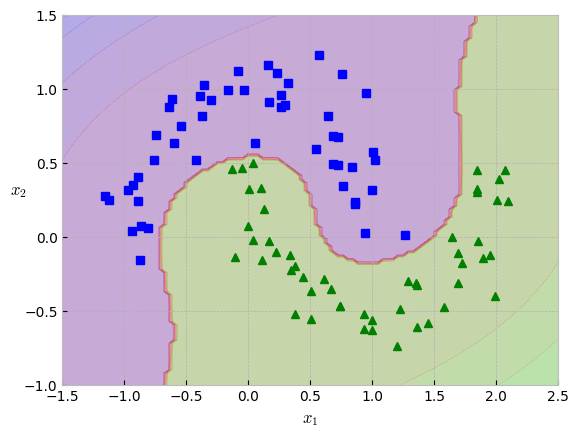

In [14]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

def plot_dataset(X, t, axes):
    plt.plot(X[:, 0][t==0], X[:, 1][t==0], "bs")
    plt.plot(X[:, 0][t==1], X[:, 1][t==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plot_predictions(poly_svm, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, t, [-1.5, 2.5, -1, 1.5])

In [15]:
poly_svm.named_steps.SVC.coef_

array([[ 0.        , -1.36393422, -0.25121301, -4.402802  , -0.44570237,
        -0.50069116,  6.67859633, -1.16995026,  2.19305263, -2.76784647]])

Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs). That said, at a low polynomial degree, this method cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow. 

Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the **kernel trick** (explained in a moment). The kernel trick makes it possible to get the same result as if you had added many polynomial features, even with very high-degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features because you don’t actually add any features. This trick is implemented by the SVC class. Let’s test it on the moons dataset:

In [16]:
poly_svm_clf = Pipeline([('scaler', StandardScaler()),
                        ('SVC', SVC(kernel='poly', degree=3))])
poly_svm_clf.fit(X, t)

Pipeline(steps=[('scaler', StandardScaler()), ('SVC', SVC(kernel='poly'))])

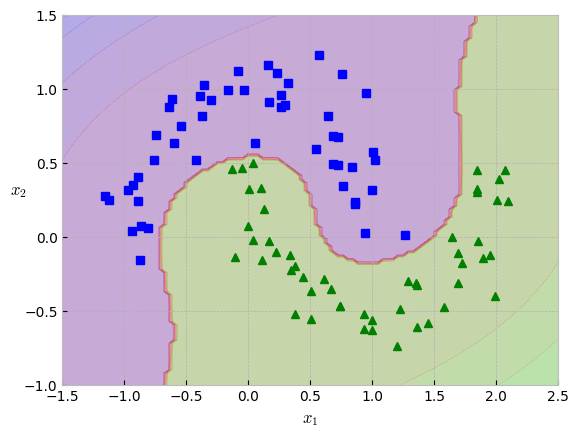

In [17]:
plot_predictions(poly_svm, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, t, [-1.5, 2.5, -1, 1.5])

The hyperparameter ```coef0``` controls how much the model is influenced by high degree polynomials versus low-degree polynomials. This parameter is only significant if the kernel function is ```poly``` or ```sigmoid```.

Note that in the polynomial kernel, the powers of values smaller than one gets closer and closer to 0, while the same power of value bigger than one grows to infinity. You can use ```coef0``` to *scale* your data so there is no such distinction - you can add $1-\min \mathbf{x}^T\mathbf{y}$, so no values are smaller than 1.

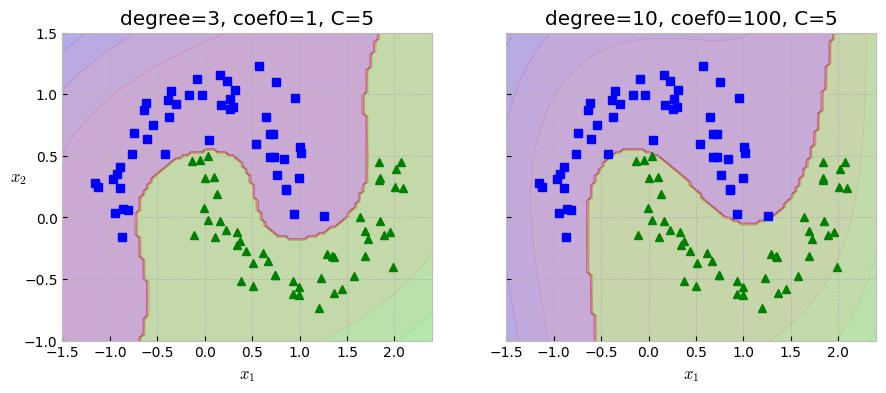

In [18]:
poly100_svm_clf = Pipeline([('scaler', StandardScaler()),
                           ('SVC', SVC(kernel='poly', degree=3, coef0=100))])
poly100_svm_clf.fit(X, t)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_svm, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, t, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, t, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("");

### Gaussian RBF Kernel

A popular kernel function is the **radial basis function** (RBF kernel):

\begin{align*}
k_{\text{RBF}}(\mathbf{x},\mathbf{y}) &= \exp\left(-\gamma\Vert\mathbf{x}-\mathbf{y}\Vert^2\right)
\end{align*}

typical values for $\gamma=\frac{1}{2\sigma^2}$. As you can see, the RBF kernel is measures the **similarity** between two points as a function of the kernel **bandwidth** $\sigma$.

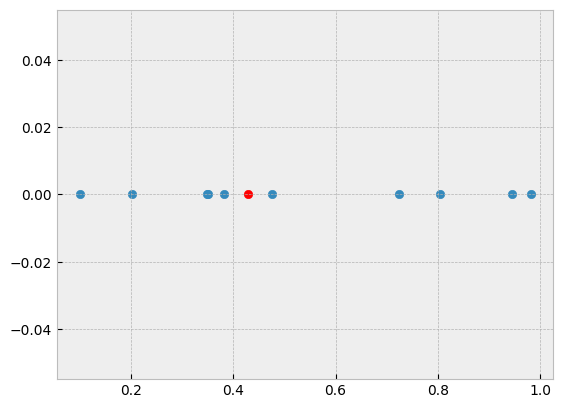

In [19]:
x = np.random.rand(10)
x1 = np.median(x)

plt.scatter(x, np.zeros(len(x)))
plt.scatter(x1, 0, c='r');

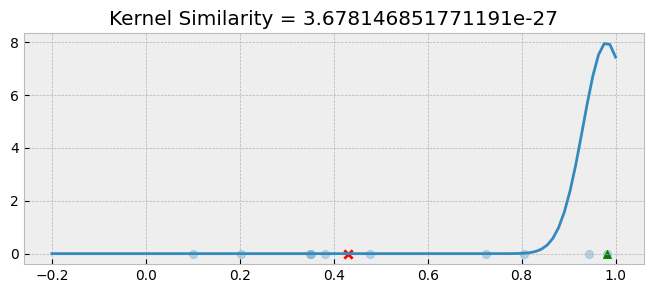

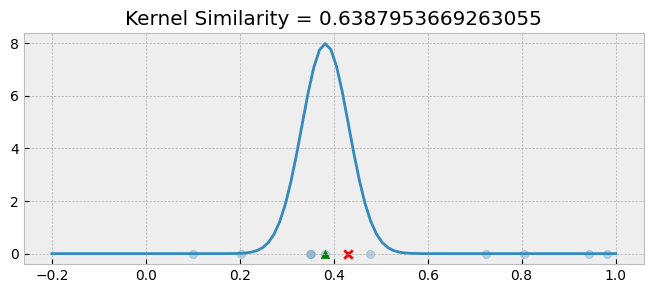

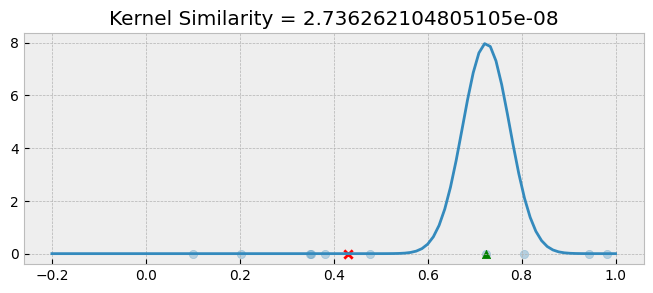

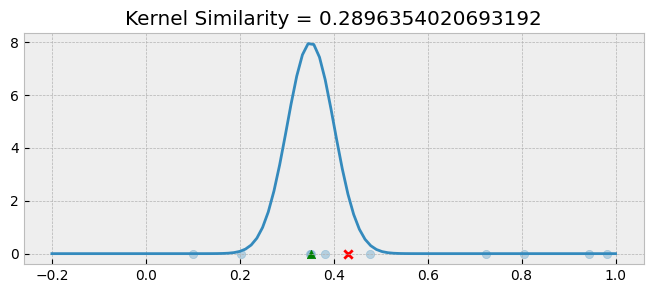

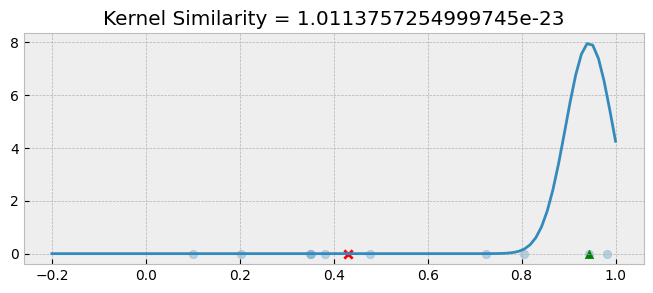

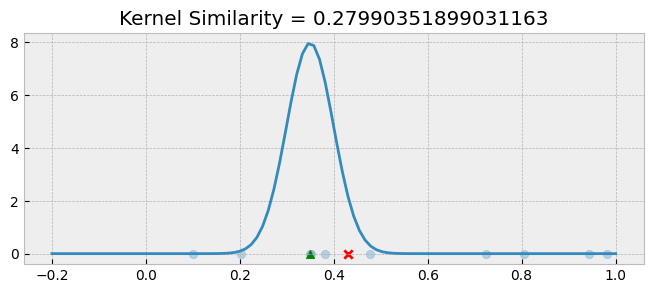

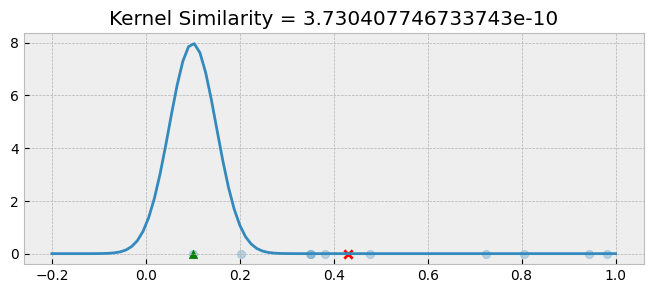

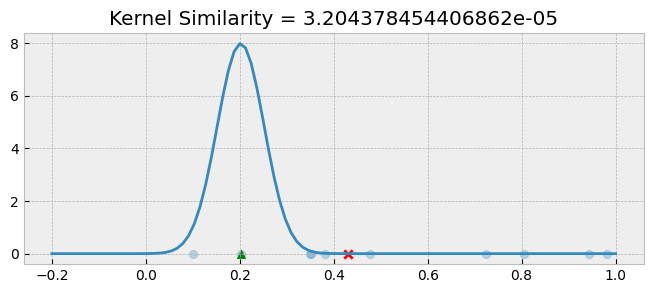

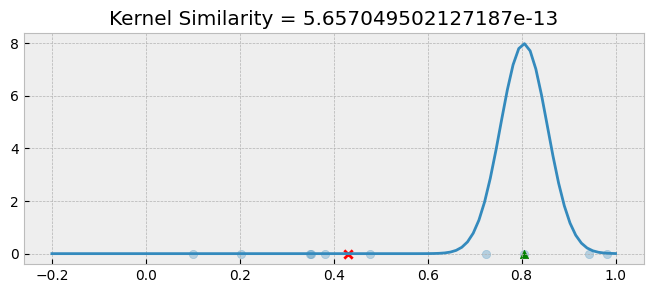

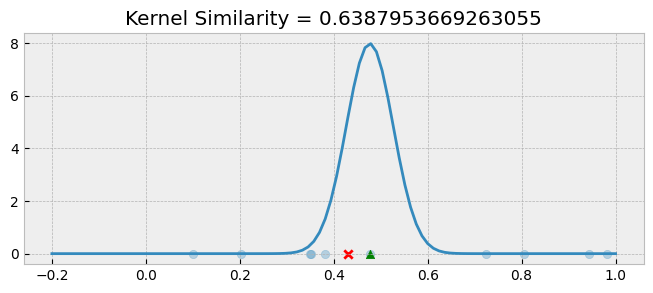

In [20]:
sig = 0.05
xline = np.linspace(-0.2,1,100)

for i in range(len(x)):
    plt.figure(figsize=(8,3))
    plt.scatter(x, np.zeros(len(x)), alpha=0.3)
    plt.scatter(x[i], 0, c='g', marker='^')
    plt.scatter(x1, 0, c='r',marker='x')
    plt.plot(xline, np.exp(-(xline-x[i])**2/(2*sig**2))/np.sqrt(2*np.pi*sig**2))
    k_similarity=np.exp(-np.linalg.norm(x[i]-x1)**2/(2*sig**2))
    plt.title('Kernel Similarity = '+str(k_similarity));

Alright! I will explain this ENTIRE code in **BABY LANGUAGE**, like you’re 100% new and learning from scratch.
No math. No formulas. Just intuition.

---

# 🧸 **What is happening overall?**

You are testing **Polynomial SVMs** on the **moons dataset**.

The goal:

👉 **See how SVM changes its decision boundary when you change polynomial settings.**

That’s it.

---

# 🧸 **FIRST: the moons dataset**

```python
X, t = make_moons(n_samples=100, noise=0.15, random_state=0)
plt.scatter(...)
```

This creates a dataset that looks like two half-moons:

```
🌙  🌙
   🌙  🌙
```

Two curved shapes → not linearly separable.

So we need special SVM kernels.

---

# 🧸 **What is "polynomial SVM"?**

Think of it like giving SVM the ability to draw:

* curved boundaries
* twisty boundaries
* more flexible shapes

depending on the polynomial degree.

---

# 🧸 **PART 1 — PolynomialFeatures + Linear SVM**

```python
poly_svm = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('SVC', SVC(kernel='linear', C=10))
])
poly_svm.fit(X, t)
```

### BABY LANGUAGE:

* First step: **create new features that allow curves**
  (Like adding magic powers to your data.)

* Second step: **scale the data**
  (Make all features the same size.)

* Third step: **train a linear SVM**
  BUT because of polynomial features,
  the SVM can now draw **curvy boundaries**.

Even though the kernel is `"linear"`,
the polynomial features make the data LOOK linear in a higher dimension.

---

# 🧸 **PART 2 — plot_predictions()**

This function:

```python
def plot_predictions(clf, axes):
```

Does this:

👉 **Color the entire background based on the SVM’s decision.**

* Blue area = predicted class 0
* Green area = predicted class 1
* Darker regions = stronger confidence
* Lighter = unsure

It creates a smooth “map” of the classifier.

---

# 🧸 **PART 3 — plot_dataset()**

This only draws your data:

* class 0 → blue squares
* class 1 → green triangles

This overlays on the prediction background.

---

# 🧸 **PART 4 — Show the polynomial decision boundary**

```python
plot_predictions(poly_svm, ...)
plot_dataset(X, t, ...)
```

You see how the polynomial SVM shapes the boundary.

It will be **curvy**, not straight.

---

# 🧸 **PART 5 — poly_svm.named_steps.SVC.coef_**

This tries to show the SVM weights.
Not important for your understanding.
Just ignore it.

---

# 🧸 **PART 6 — LET'S USE REAL polynomial kernel**

Before:
You used PolynomialFeatures + linear SVM.

Now:

```python
poly_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('SVC', SVC(kernel='poly', degree=3))
])
```

This uses the **real polynomial kernel**, which is more direct.

Polynomial kernel creates curved boundaries without manually adding features.

---

# 🧸 **PART 7 — Try a more extreme polynomial**

```python
poly100_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('SVC', SVC(kernel='poly', degree=3, coef0=100))
])
```

Here:

* degree = 3 → still cubic
* **coef0 = 100** → makes curves more dramatic
  (Think: more bendy, more wiggles, more powerful)

This makes the polynomial curve **much more complex**.

---

# 🧸 **PART 8 — Compare two polynomial SVMs side by side**

```python
fig, axes = plt.subplots(ncols=2, ...)
```

This makes a 2-panel plot:

### LEFT SIDE

“degree=3, coef0=1, C=5”

👉 moderate curves
👉 smooth
👉 not too wiggly

### RIGHT SIDE

“degree=10, coef0=100, C=5”

👉 extreme curves
👉 VERY wiggly
👉 may overfit
👉 boundary twists sharply around points

---

# 🧸 **BABY SUMMARY OF THE WHOLE THING**

### 🌙 You have two moon-shaped clusters.

### 🎨 You test different polynomial SVMs:

* normal polynomial → simple curves
* extreme polynomial → very twisty curves

### 🎯 The goal is to SEE:

👉 how polynomial degree and coef0 change the decision boundary.

Higher settings = more flexible = more wiggly = more overfitting.

---

# 🧸 **SUPER SIMPLE FINAL SUMMARY**

* **Polynomial SVM** lets SVM draw **curvy lines**.
* **Higher degree or higher coef0** → **more curves and wiggles**.
* You plotted decision boundaries to compare how each SVM behaves.

---

If you want, I can:

✅ draw a cartoon to explain coef0 and degree
✅ explain what degree actually means
✅ show what coef0 does using pictures
Just ask!


Okay! Let me explain **degree** and **coef0** in the polynomial kernel in **SUPER SIMPLE BABY LANGUAGE** with examples.

---

# 🎨 **Polynomial Kernel Formula (don’t worry, we’ll make it simple)**

[
K(x, x') = (x \cdot x' + \text{coef0})^\text{degree}
]

This formula has two knobs:

* **degree**
* **coef0**

Let’s understand them like everyday objects.

---

# 🧸 **1. What is DEGREE? (very simple)**

👉 **DEGREE tells how BENDY the boundary can be.**

Imagine you draw a line separating two groups:

* **degree = 1** → straight line
* **degree = 2** → simple curved line (U-shape)
* **degree = 3** → more wiggly
* **degree = 5** → even more wiggly
* **degree = 10** → crazy twisty boundary

### 🔥 Higher degree = more wiggles.

### 🎯 Baby analogy:

Think of degree like how much “curving power” the SVM has.

* degree 1 → no curve
* degree 2 → small curve
* degree 3 → medium curves
* degree 10 → super bendy noodle

---

# 🧸 **2. What is COEF0? (even simpler)**

👉 **coef0 decides how much influence the curves have vs straight parts.**

Think of it like a **curve booster**.

* **small coef0 (like 1)** → soft curves
* **large coef0 (like 100)** → BIG dramatic curves

### 🎯 Baby analogy:

coef0 = spice level 🌶️

* coef0 = 1 → mild
* coef0 = 10 → spicy
* coef0 = 100 → super spicy (sharp bends)

---

# 🎨 **Put together: degree + coef0**

* **degree = how many curves**
* **coef0 = how strong the curves are**

Example:

| degree | coef0 | How the boundary looks      |
| ------ | ----- | --------------------------- |
| 1      | any   | straight line               |
| 3      | 1     | gentle curves               |
| 3      | 100   | dramatic curves             |
| 10     | 1     | many wiggles                |
| 10     | 100   | extremely wiggly (overfits) |

---

# 🌈 **Mini cartoon explanation**

### With LOW degree, LOW coef0:

```
soft curve
   _
 /   \
```

### With LOW degree, HIGH coef0:

```
stronger curve
   __
 /    \
```

### With HIGH degree, HIGH coef0:

```
crazy twists
__/\/\/\/\/\__
```

---

# 🧠 **Very simple memory trick**

👉 **degree = how many bends**
👉 **coef0 = how strong the bends**

---

If you want, I can show:

📌 graphs comparing different degrees
📌 graphs comparing different coef0 values
📌 a simple animation idea
📌 a one-sentence definition for your exam notes

Just tell me!


Let's try the ```SVC``` class with the Gaussian RBF kernel:

In [21]:
rbf_svm_clf = Pipeline([('scaler', StandardScaler()),
                        ('svm', SVC(kernel='rbf', gamma=5,
                                    C=0.001))])
rbf_svm_clf.fit(X,t)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=0.001, gamma=5))])

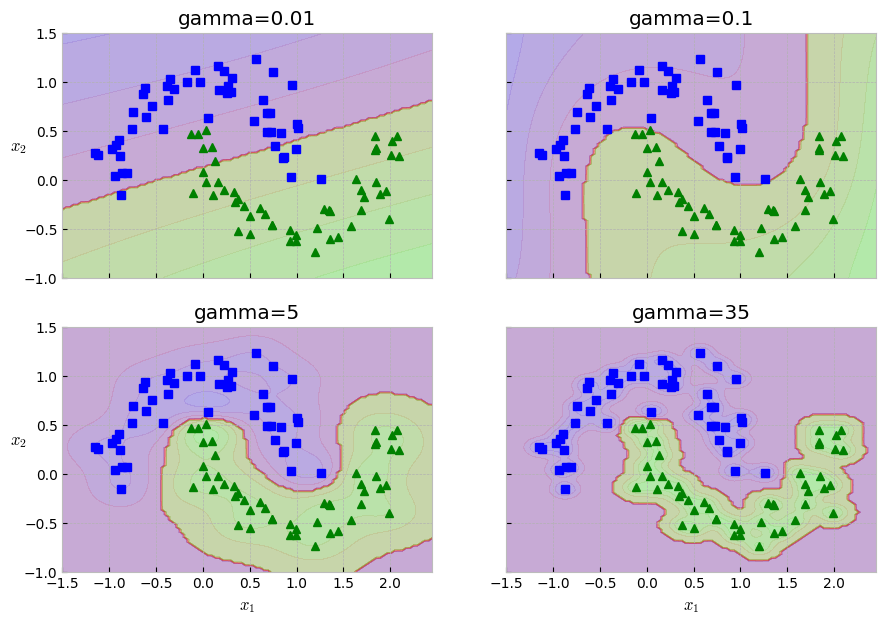

In [22]:
gamma_vals = [0.01, 0.1, 5, 35]

svm_clfs = []
for gamma in gamma_vals:
    rbf_kernel_svm_clf = Pipeline([('scaler', StandardScaler()),
                                   ('svm', SVC(kernel='rbf', 
                                               gamma=gamma,
                                               C=100))])
    rbf_kernel_svm_clf.fit(X, t)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, t, [-1.5, 2.45, -1, 1.5])
    gamma = gamma_vals[i]
    plt.title(f"gamma={gamma}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("");

Perfect — I will explain this **SUPER SIMPLE**, like you’re completely new.
No math. No jargon. Just intuition.
This code is showing **how the SVM RBF kernel behaves when you change gamma**.

---

# 🌟 **FIRST: What is gamma? (VERY SIMPLE)**

👉 **Gamma = how far each point "influences" the boundary.**

Think of every training point dropping a small “paint splatter” on the graph:

* **Small gamma** → paint spreads wide → smooth, simple boundary
* **Big gamma** → paint is tight → boundary wiggles and overfits

That’s it.

---

# ⭐ **WHAT YOUR CODE DOES (in baby language)**

## 🔹 Step 1 — Train SVM with RBF kernel

```python
rbf_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_svm_clf.fit(X, t)
```

This means:

* scale the data
* train an SVM
* using **RBF kernel**
* with **gamma = 5**
* C = 0.001 (very soft margin)

This is just one example model.

---

## 🔹 Step 2 — Try multiple gamma values

```python
gamma_vals = [0.01, 0.1, 5, 35]
```

These are **four different strengths** of "paint splatter."

We will train four SVM models — one for each gamma.

---

## 🔹 Step 3 — Create SVMs for every gamma value

```python
for gamma in gamma_vals:
    rbf_kernel_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', gamma=gamma, C=100))
    ])
    rbf_kernel_svm_clf.fit(X, t)
    svm_clfs.append(rbf_kernel_svm_clf)
```

Translated to simple English:

👉 For each gamma value:

* build an SVM
* train it
* store it in a list

So at the end you have **four different SVMs**:

| Model   | Gamma |
| ------- | ----- |
| Model 1 | 0.01  |
| Model 2 | 0.1   |
| Model 3 | 5     |
| Model 4 | 35    |

Each gamma creates a **different shape of decision boundary**.

---

## 🔹 Step 4 — Make a 2×2 grid of plots

```python
fig, axes = plt.subplots(2, 2, figsize=(10.5, 7))
```

This just prepares four boxes for four pictures.

---

## 🔹 Step 5 — Plot each SVM’s predictions

```python
plt.sca(axes[i // 2, i % 2])
plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, t, [-1.5, 2.45, -1, 1.5])
plt.title(f"gamma={gamma}")
```

This part fills each box with:

* the decision boundary
* the training points
* a title that says what gamma was used

So you will get something like:

```
+----------------------+----------------------+
|  gamma = 0.01        |   gamma = 0.1        |
| (smooth boundary)    | (more curved)        |
+----------------------+----------------------+
|  gamma = 5           |   gamma = 35         |
| (very curvy)         | (super overfitted)   |
+----------------------+----------------------+
```

---

# ⭐⭐ VERY SIMPLE SUMMARY ⭐⭐

Your entire code is doing this:

### 👉 Train SVM four times

### 👉 Each time with a different gamma value

### 👉 Draw all four results

### 👉 So you can SEE how gamma changes the model

That's it.

---

# ⭐ What you will observe

### 🔹 gamma = 0.01

Boundary is almost a **straight line** (too simple).

### 🔹 gamma = 0.1

Boundary becomes **a little curved** (good flexibility).

### 🔹 gamma = 5

Boundary becomes **very wiggly**.

### 🔹 gamma = 35

Boundary becomes **crazy wiggly** → **overfits**.

---

# 🌈 **If gamma is small → smooth**

# 🔥 **If gamma is large → crazy and overfit**

That’s the whole lesson of this code.

---

If you want, I can draw a picture showing small vs big gamma in cartoon form.


# Computational Complexity

The ```SVC``` class is based on the ```libsvm``` library, which implements an algorithm that supports the kernel trick. The training time complexity is usually between $O(m^2\times N)$ and $O(m^3 \times N)$, where $M$ is the number of features and $N$ is the number of samples. Unfortunately, this means that it gets dreadfully **slow when the number of training instances gets large** (e.g., hundreds of thousands of instances). 

This algorithm is perfect for complex small or medium-sized training sets. It scales well with the number of features, especially with sparse features (i.e., when each instance has few nonzero features). In this case, the algorithm scales roughly with the average number of nonzero features per instance.

---